# 資料初步探索

##資料前處理

### 資料讀取

In [ ]:
pip install pyreadr

     |████████████████████████████████| 361 kB 5.4 MB/s 


In [ ]:
import pyreadr

tornato = pyreadr.read_r('/content/drive/MyDrive/SMOA/news_tornato_2019.rds')
wawawa = pyreadr.read_r('/content/drive/MyDrive/SMOA/newswawawa_yt_comments.rds')

print(tornato.keys()) 
print(wawawa.keys()) 

odict_keys([None])
odict_keys([None])


In [ ]:
tornato_df = tornato[None] 
wawawa_df = wawawa[None]

In [ ]:
tornato_df

,videoId,commentId,authorDisplayName,textOriginal,likeCount,publishedAt
0,1Askpqzm7Pk,UgxcHzFleSgHZWOCEG94AaABAg,楊淑貞,文山伯的論述一級棒!!,2.0,2019-02-07 10:40:40
1,1Askpqzm7Pk,UgwYTtea2rgguArXoXh4AaABAg,k kk,新年大家一條心，2020再滅東廠，亂用善款的肥菊才能関好関滿,5.0,2019-02-07 08:53:48
2,1Askpqzm7Pk,UgxMZiM1Y17qsElrO2d4AaABAg,留政敏,民進黨不倒台灣中華民國永遠都不會好,2.0,2019-02-07 08:49:25
3,1Askpqzm7Pk,UgwH4M2TmmXqPjnhtxF4AaABAg,Amber Chen,假意和真心的戰爭，文山伯一針見血啊,8.0,2019-02-07 06:12:29
4,1Askpqzm7Pk,UgzH-1y7aHi7B8CYsLJ4AaABAg,A,國民黨沒好到哪，民進黨也是廢,3.0,2019-02-07 05:29:26
...,...,...,...,...,...,...
180573,ZokitvaKypg,UgzN2Me6jVRDJ2ObX5l4AaABAg.93EsdSnotLn93FkVOucaNg,林琳,我也喜歡這配樂，很好聽。,5.0,2020-01-01 17:15:43
180574,ZokitvaKypg,UgzN2Me6jVRDJ2ObX5l4AaABAg.93EsdSnotLn93FU-3llApl,愛希絲,@曾淑卿 就像韓菩薩旁邊的龍虎護法,6.0,2020-01-01 14:42:45
180575,ZokitvaKypg,UgwlGS7xh5Ryiki1brh4AaABAg,酷寒戰士,2020，✌️🇹🇼✌️🇹🇼\n中華民國，愛你愛你,287.0,2020-01-01 09:06:54
180576,ZokitvaKypg,Ugz9fnoQ3g2Tz1QTSLt4AaABAg,林昌賢VLOG,柯文哲要報告一個好消息：楊蕙如案明天就移送檢調！,97.0,2020-01-01 09:06:28


In [ ]:
wawawa_df

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,lang,text_len,isSimplified,isUSRelated
0,__NbgQjyQ5c,UgyanjqIq8wbBKWD5GV4AaABAg,NaN,mio komuro,翁老師超搞笑XD,0.0,2019-09-13 09:26:25,2019-09-13 09:26:25,zh,8,False,False
1,__NbgQjyQ5c,UgxQyBs_f37VnzoHyJx4AaABAg,NaN,izumi zhuang,郭小姐的往生被說，真的囂張！,1.0,2019-07-28 11:23:42,2019-07-28 11:23:42,zh,14,False,False
2,__NbgQjyQ5c,UgxaM8x2RHIeX65-ieZ4AaABAg,NaN,Li Ching Lo,太喜歡翁老師的幽默，好好笑喔！,3.0,2019-07-26 11:07:28,2019-07-26 11:07:28,zh,15,False,False
3,__NbgQjyQ5c,UgzAjJwcB6a8Uhy9CHZ4AaABAg,NaN,張伊君,昱晴小姐太獨立太強，所以另一半小鮮肉就以為是妳的大孩子一樣囉！,0.0,2019-04-16 05:11:23,2019-04-16 05:11:23,zh,31,False,False
4,__NbgQjyQ5c,UgzkqG9yXb6uqcOF9ip4AaABAg,NaN,Chen HUi-li,看人吧，能愛的人養，不愛的人不要養，要自己的條件和愛人的能力,1.0,2019-01-04 18:17:28,2019-01-04 18:17:28,zh,30,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
167482,ZZq8ciYLXwg,UgzlKOs7LfhtTMYedaB4AaABAg,NaN,小樂,921是台灣人永遠的記憶...,2.0,2020-05-22 10:12:57,2020-05-22 10:12:57,zh,15,False,False
167483,ZZq8ciYLXwg,UgzlKOs7LfhtTMYedaB4AaABAg.98xd-8SDEbG98yaNlE_Ss8,UgzlKOs7LfhtTMYedaB4AaABAg,曾莉雯,真的~整夜都在餘震，記憶深刻,0.0,2020-05-22 19:09:20,2020-05-22 19:09:20,zh,14,False,False
167484,ZZq8ciYLXwg,Ugzz5iMNmE7XjxtHTvh4AaABAg,NaN,韓寒,921真的是全台灣人的痛........我還記得當年我還小，當下發生的時候我一直以為有人在搶...,5.0,2020-05-22 05:17:56,2020-05-22 05:17:56,zh,82,False,False
167485,ZZq8ciYLXwg,UgyZEJrWrYiNwvUv5kN4AaABAg,NaN,Jing Wang,好孩子一个！,1.0,2020-05-22 04:02:35,2020-05-22 04:02:35,zh-cn,6,True,False


In [ ]:
tornato_videoList = pyreadr.read_r('/content/drive/MyDrive/SMOA/新聞龍捲風_videolist.rds')
wawawa_videoList = pyreadr.read_r('/content/drive/MyDrive/SMOA/新聞挖挖挖_videolist.rds')

print(tornato_videoList.keys()) 
print(wawawa_videoList.keys()) 

odict_keys([None])
odict_keys([None])


In [ ]:
tornato_videoList_df = tornato_videoList[None] 
wawawa_videoList_df = wawawa_videoList[None]

In [ ]:
tornato_videoList_df

,channelId,channelTitle,title,publishedAt,description,videoId
0,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【新春特輯】史上最狂來賓！為人民發聲激動到站起來 連立綱都快HOLD不住啦 │ 來賓經典片段...,2019-02-08T11:19:55Z,➣來賓經典片段‧村長篇（下）：\n人民日子不好過！村長引經據典開釋政府 書法、講古樣樣行！\...,6Ua7Q6eLaVk
1,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【新春特輯】人民日子不好過！村長引經據典開釋政府 書法、講古樣樣行！ │ 來賓經典片段‧村長...,2019-02-08T11:20:19Z,➣來賓經典片段‧村長篇（上）：\n史上最狂來賓！為人民發聲激動到站起來 連立綱都快HOLD不...,bJtGH3lNiFU
2,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【新春特輯】講到沙啞、激動泛淚！文山伯為農漁民發聲 中肯到讓你看了停不下來 │ 來賓經典片段...,2019-02-08T11:20:54Z,➣來賓經典片段‧文山伯篇（下）：\n民進黨只想選票官位！文山伯為人民怒吼 蔡政府聽到了嗎？ ...,1T88xVai6Lk
3,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【新春特輯】民進黨只想選票官位！文山伯為人民怒吼 蔡政府聽到了嗎？ │ 來賓經典片段‧文山伯...,2019-02-08T11:20:43Z,➣來賓經典片段‧文山伯篇（上）：\n講到沙啞、激動泛淚！文山伯為農漁民發聲 中肯到讓你看了停...,1Askpqzm7Pk
4,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【新春特輯】台灣人不欠民進黨！強強滾退黨被叫叛徒 也要為了人民站出來 │ 來賓經典片段‧強強...,2019-02-08T11:21:05Z,➣來賓經典片段‧強強滾篇（下）：\n看清民進黨！強強滾退黨為民發聲 政府的良心道德在哪裡？\...,zUFaxOsoTx0
...,...,...,...,...,...,...
5080,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【初選開封】不能鬆懈！韓勝出打壓抹黑不會停 陳揮文：贏得大選才重要！,2019-07-15T09:26:22Z,※此為中天新聞「國民黨初選開封特別報導」之評論片段。\n\n➣更多民調開封相關影片：\n史無...,T_TBfhpI2O0
5081,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【初選開封】五家民調結果出爐！韓大勝郭17%、黨內互比全過半 黃暐瀚：證明錢不能買到民心,2019-07-15T08:16:49Z,※此為中天新聞「國民黨初選開封特別報導」之評論片段。\n\n➣更多民調開封相關影片：\n史無...,sijX5LkmVy8
5082,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【初選開封】史無前例！韓家軍撐過日曬雨淋、死守電話意義何在？ 黃暐瀚：就算飛彈打過來都會去投票,2019-07-15T07:12:11Z,※此為中天新聞「國民黨初選開封特別報導」之評論片段。\n\n➣更多民調開封相關影片：\n五家...,m6FnBrBSUMc
5083,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別公開】愛河歌廳秀！韓國瑜快閃現身林國慶義賣演唱會 民眾愛心滿滿捐款破210萬！,2019-07-06T13:19:09Z,➣韓國瑜7/6快閃彩蛋全程影音：https://youtu.be/v4EYc9eS5DU\n...,V3_AklhBt5Y


In [ ]:
wawawa_videoList_df

,channelId,channelTitle,title,publishedAt,description,videoId
0,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【新聞挖挖哇】媽寶老公才是寶？婆婆得寸進尺搞瘋媳婦20200716｜來賓：呂文婉、狄志為、欣...,2020-07-16T09:03:31Z,軍官戀女老闆爆不舉 找嫩妹測試老二超誠實\n👉https://youtu.be/SxNQPU...,vnWcBDZD1fI
1,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,新聞挖挖哇：一輩子的爛婚姻？專家潰堤痛哭此生之痛！20200714｜來賓：許常德、廖美然、黃...,2020-07-14T09:22:33Z,嫩妻趁尪入獄搞帥哥 公公跟監抓鮑逼洗門風\n👉https://youtu.be/k0wrNS...,LMBn4hAPvYg
2,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【新聞挖挖哇】房子是誰的？許常德直言這種老婆不要娶？！20200713｜來賓：藝人咪咪、許常...,2020-07-06T06:29:39Z,有錢人寵兒送出國 晚年下場讓小冬瓜心疼\n👉https://youtu.be/YAvw3Ig...,4eHGyokRnvM
3,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【新聞挖挖哇】房子是誰的？許常德直言這種老婆不要娶？！20200713｜來賓：藝人咪咪、許常...,2020-07-06T06:29:31Z,有錢人寵兒送出國 晚年下場讓小冬瓜心疼\n👉https://youtu.be/YAvw3Ig...,4eHGyokRnvM
4,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【新聞挖挖哇】房子是誰的？許常德直言這種老婆不要娶？！20200713｜來賓：藝人咪咪、許常...,2020-07-06T06:29:22Z,有錢人寵兒送出國 晚年下場讓小冬瓜心疼\n👉https://youtu.be/YAvw3Ig...,4eHGyokRnvM
...,...,...,...,...,...,...
5233,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,Private video,2020-07-17T02:24:13Z,This video is private.,IQnBVJo_QeU
5234,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,Private video,2020-07-17T02:27:50Z,This video is private.,5gtj2WwLP-k
5235,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,Private video,2020-07-17T02:31:24Z,This video is private.,nd5rN7o8Qag
5236,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,Private video,2020-07-17T02:35:47Z,This video is private.,Yc_3N498CYw


### 資料合併

In [ ]:
import pandas as pd

In [ ]:
#@title
pd.merge(tornato_videoList_df, tornato_df, on="videoId")

In [ ]:
#@title
sorted(pd.unique(tornato_videoList_df['videoId']))

In [ ]:
#@title
sorted(pd.unique(tornato_df['videoId']))

In [ ]:
#@title
tornato_videoList_df["videoId"].value_counts()[:154]

In [ ]:
#@title
tornato_videoList_df[tornato_videoList_df["videoId"] == "1T88xVai6Lk"]

In [ ]:
#@title
tornato_df[tornato_df["videoId"] == "1T88xVai6Lk"]

In [ ]:
tornato_videoList_df =  tornato_videoList_df.drop_duplicates(subset=['videoId'], keep="last")

In [ ]:
tornato_full_df = pd.merge(tornato_videoList_df, tornato_df, on="videoId")

In [ ]:
wawawa_videoList_df = wawawa_videoList_df.drop_duplicates(subset=['videoId'], keep="last")

In [ ]:
wawawa_full_df = pd.merge(wawawa_videoList_df, wawawa_df, on="videoId")

## Exploratory data analysis

### 資料筆數

In [ ]:
tornato_full_df

,channelId,channelTitle,title,publishedAt_x,description,videoId,commentId,authorDisplayName,textOriginal,likeCount,publishedAt_y
0,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【新春特輯】史上最狂來賓！為人民發聲激動到站起來 連立綱都快HOLD不住啦 │ 來賓經典片段...,2019-02-08T11:19:55Z,➣來賓經典片段‧村長篇（下）：\n人民日子不好過！村長引經據典開釋政府 書法、講古樣樣行！\...,6Ua7Q6eLaVk,UgzADoMogmXIQf2r0z94AaABAg,白瑋琛,村長這氣頭～活到一百歲應該沒問題吧，超猛，多保重身體喲。,2.0,2019-03-12 04:09:17
1,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【新春特輯】史上最狂來賓！為人民發聲激動到站起來 連立綱都快HOLD不住啦 │ 來賓經典片段...,2019-02-08T11:19:55Z,➣來賓經典片段‧村長篇（下）：\n人民日子不好過！村長引經據典開釋政府 書法、講古樣樣行！\...,6Ua7Q6eLaVk,UgwXzXdip4xEmMoCMyZ4AaABAg,宋淑貞,這位村長好有正義感，好可愛啊！多請葉村長來會增加收視率喔！,2.0,2019-03-07 12:37:13
2,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【新春特輯】史上最狂來賓！為人民發聲激動到站起來 連立綱都快HOLD不住啦 │ 來賓經典片段...,2019-02-08T11:19:55Z,➣來賓經典片段‧村長篇（下）：\n人民日子不好過！村長引經據典開釋政府 書法、講古樣樣行！\...,6Ua7Q6eLaVk,UgzQ1i5QoWB6iWDAHaF4AaABAg,美智,詐欺集團民進黨還我流血流汗納稅錢,3.0,2019-02-08 03:43:29
3,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【新春特輯】史上最狂來賓！為人民發聲激動到站起來 連立綱都快HOLD不住啦 │ 來賓經典片段...,2019-02-08T11:19:55Z,➣來賓經典片段‧村長篇（下）：\n人民日子不好過！村長引經據典開釋政府 書法、講古樣樣行！\...,6Ua7Q6eLaVk,UgyWszMAD3Pt59Nuefh4AaABAg,Relax Liu,宜蘭縣的村長超可愛的認真👍👏👏👏,3.0,2019-02-07 18:19:30
4,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【新春特輯】史上最狂來賓！為人民發聲激動到站起來 連立綱都快HOLD不住啦 │ 來賓經典片段...,2019-02-08T11:19:55Z,➣來賓經典片段‧村長篇（下）：\n人民日子不好過！村長引經據典開釋政府 書法、講古樣樣行！\...,6Ua7Q6eLaVk,Ugz9bMUZCwihVD8AEJp4AaABAg,GOD,X他X的 民進黨的一個比一個爛,6.0,2019-02-07 12:22:29
...,...,...,...,...,...,...,...,...,...,...,...
180573,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別專訪】2020要選出能為人民發聲的總統！ 文山伯相揪韓家軍6/1凱道見！,2019-07-06T13:18:51Z,6月1日「庶民總統團結台灣」凱道挺韓大會師\n網路直播連結：https://youtu.be...,vo32ni6LkEE,UgxIwhloVJjMon6lFRB4AaABAg,傑西李佛摩,綠共英皇 打韓 打柯 打賴 綠色恐怖再起,45.0,2019-05-31 05:48:34
180574,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別專訪】2020要選出能為人民發聲的總統！ 文山伯相揪韓家軍6/1凱道見！,2019-07-06T13:18:51Z,6月1日「庶民總統團結台灣」凱道挺韓大會師\n網路直播連結：https://youtu.be...,vo32ni6LkEE,UgyriIlXBGwNhGSYrWJ4AaABAg,傑西李佛摩,吳打手。每每爆料 每每賠錢 爆睡菊 還和解 法院認證吳騙子,97.0,2019-05-31 05:48:28
180575,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別專訪】2020要選出能為人民發聲的總統！ 文山伯相揪韓家軍6/1凱道見！,2019-07-06T13:18:51Z,6月1日「庶民總統團結台灣」凱道挺韓大會師\n網路直播連結：https://youtu.be...,vo32ni6LkEE,UgznneAnZyEodrKlVO94AaABAg,andy S,凱道是要舉辦支持外遇包養大造勢嗎？？？可怕 😨😨😨😨😨😨😨😨😨\n不知進退、還貪心想選總統，...,4.0,2019-05-31 05:48:07
180576,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別專訪】2020要選出能為人民發聲的總統！ 文山伯相揪韓家軍6/1凱道見！,2019-07-06T13:18:51Z,6月1日「庶民總統團結台灣」凱道挺韓大會師\n網路直播連結：https://youtu.be...,vo32ni6LkEE,UgznneAnZyEodrKlVO94AaABAg.8v_uu5czy8o8va5-RRmic6,木沐,有人沒有證據就想帶風向，不是有眼無珠朱，就是屎遮眼，要不然就是人渣1450,2.0,2019-05-31 07:25:06


In [ ]:
wawawa_full_df

,channelId,channelTitle,title,publishedAt_x,description,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt_y,updatedAt,lang,text_len,isSimplified,isUSRelated
0,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【新聞挖挖哇】媽寶老公才是寶？婆婆得寸進尺搞瘋媳婦20200716｜來賓：呂文婉、狄志為、欣...,2020-07-16T09:03:31Z,軍官戀女老闆爆不舉 找嫩妹測試老二超誠實\n👉https://youtu.be/SxNQPU...,vnWcBDZD1fI,UgzkF16iziov9OCevzx4AaABAg,NaN,jeli lin,阿德老師每一次節目講的內容，我都有完全的共鳴。真的找到最源頭的點，才是處理問題的根本。,0.0,2020-07-18 10:03:25,2020-07-18 10:03:25,zh,43,False,False
1,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【新聞挖挖哇】媽寶老公才是寶？婆婆得寸進尺搞瘋媳婦20200716｜來賓：呂文婉、狄志為、欣...,2020-07-16T09:03:31Z,軍官戀女老闆爆不舉 找嫩妹測試老二超誠實\n👉https://youtu.be/SxNQPU...,vnWcBDZD1fI,UgzvZwrFTUlrTF2GxP94AaABAg,NaN,Mandy Gu,欣西亞引述網友的討論「要生小孩沒經過小孩的同意⋯如果生在郭台銘家⋯」，反觀父母，誰不希望成為...,0.0,2020-07-18 05:57:16,2020-07-18 05:57:16,zh,120,False,False
2,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【新聞挖挖哇】媽寶老公才是寶？婆婆得寸進尺搞瘋媳婦20200716｜來賓：呂文婉、狄志為、欣...,2020-07-16T09:03:31Z,軍官戀女老闆爆不舉 找嫩妹測試老二超誠實\n👉https://youtu.be/SxNQPU...,vnWcBDZD1fI,UgwIMB6gehNLXuVPDVp4AaABAg,NaN,Leisi Ya,一開始就不應該兩家長輩住一起了。不管感情有多好，最後一定會出事,1.0,2020-07-18 03:17:55,2020-07-18 03:17:55,zh,31,False,False
3,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【新聞挖挖哇】媽寶老公才是寶？婆婆得寸進尺搞瘋媳婦20200716｜來賓：呂文婉、狄志為、欣...,2020-07-16T09:03:31Z,軍官戀女老闆爆不舉 找嫩妹測試老二超誠實\n👉https://youtu.be/SxNQPU...,vnWcBDZD1fI,Ugx6Q46ScgNg7-FA24x4AaABAg,NaN,Phyixi Lynn,劉墉的「媽寶」說法根本是戀母情節+封建思想，轉貼在妻子身上真可怕\n越聽越超噁,0.0,2020-07-18 03:16:35,2020-07-18 03:16:35,zh,38,False,False
4,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【新聞挖挖哇】媽寶老公才是寶？婆婆得寸進尺搞瘋媳婦20200716｜來賓：呂文婉、狄志為、欣...,2020-07-16T09:03:31Z,軍官戀女老闆爆不舉 找嫩妹測試老二超誠實\n👉https://youtu.be/SxNQPU...,vnWcBDZD1fI,UgxSzwvP_qSx5f4QUGN4AaABAg,NaN,Niki Ding,有小小一建議，一開始就說這些額外房間是給外國人home stay 的，婆婆就不太容易想住進來⋯：）,0.0,2020-07-18 01:56:01,2020-07-18 01:56:01,zh,49,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167482,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,新聞挖挖哇：兩個孫子可以嗎？翁燦燿老師講了什麼讓大家爆笑？,2019-08-01T10:12:45Z,全集節目完整版 https://youtu.be/lzByAFq3doQ\n臉書請搜尋【新聞...,FBTC6FObkTs,UggF4tf-KYWmSXgCoAEC,NaN,L S,這段超好笑,42.0,2017-07-08 06:12:33,2017-07-08 06:12:33,zh,5,False,False
167483,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,新聞挖挖哇：兩個孫子可以嗎？翁燦燿老師講了什麼讓大家爆笑？,2019-08-01T10:12:45Z,全集節目完整版 https://youtu.be/lzByAFq3doQ\n臉書請搜尋【新聞...,FBTC6FObkTs,UgiTwQKNkz81E3gCoAEC,NaN,伯公仔,還係玉姐愛聰明不想做同父異母的媽若係生了問題多,2.0,2017-07-08 04:58:08,2017-07-08 04:58:08,zh,23,False,False
167484,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,新聞挖挖哇：兩個孫子可以嗎？翁燦燿老師講了什麼讓大家爆笑？,2019-08-01T10:12:45Z,全集節目完整版 https://youtu.be/lzByAFq3doQ\n臉書請搜尋【新聞...,FBTC6FObkTs,Ugigjv4PtBxhb3gCoAEC,NaN,Million Chiu,找有小孩的對象，雖然可以沒有生育壓力，但除非身體狀況不允許，最好要生育一個自己的骨肉。別人生...,2.0,2017-07-08 04:48:22,2017-07-08 04:54:41,zh,188,False,False
167485,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,新聞挖挖哇：兩個孫子可以嗎？翁燦燿老師講了什麼讓大家爆笑？,2019-08-01T10:12:45Z,全集節目完整版 https://youtu.be/lzByAFq3doQ\n臉書請搜尋【新聞...,FBTC6FObkTs,Ugigjv4PtBxhb3gCoAEC.8UjxyxZ3Evh8jvkU_pFLnx,Ugigjv4PtBxhb3gCoAEC,洪秀芬,孩子應認真和單親父或母親談論，畢竟孩子無法取代父母的角色，例如不能做愛。\n還有將來若要結婚...,0.0,2018-08-14 11:03:40,2018-08-14 11:03:40,zh,150,False,False


新聞龍捲風180578筆、新聞挖挖哇167487筆

### 欄位名稱、資料型態

In [ ]:
tornato_full_df.dtypes

channelId                    object
channelTitle                 object
title                        object
publishedAt_x                object
description                  object
videoId                      object
commentId                    object
authorDisplayName            object
textOriginal                 object
likeCount                   float64
publishedAt_y        datetime64[ns]
dtype: object

In [ ]:
wawawa_full_df.dtypes

channelId                    object
channelTitle                 object
title                        object
publishedAt_x                object
description                  object
videoId                      object
commentId                    object
parentId                     object
authorDisplayName            object
textOriginal                 object
likeCount                   float64
publishedAt_y        datetime64[ns]
updatedAt            datetime64[ns]
lang                         object
text_len                      int32
isSimplified                   bool
isUSRelated                    bool
dtype: object

### 涵蓋時間範圍

In [ ]:
tornato_full_df.sort_values(by='publishedAt_x', ascending=False)[:1]

,channelId,channelTitle,title,publishedAt_x,description,videoId,commentId,authorDisplayName,textOriginal,likeCount,publishedAt_y
106153,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【完整版】徐永明嫌疑重大80萬交保能防串證？ 國「賄」立委修SOGO條款還有未爆彈？2020...,2020-08-05T04:21:45Z,#徐永明 #SOGO #立委收賄 #李恆隆 #川普 #美國 #全球疫情 #羅霈穎\n\n《新...,JUAdpnzSud0,Ugzz5Td6y0fvuX39VF14AaABAg,賴皮,立政治獻金法幹什麼？\n就是非依法即罪！\n若不，則永遠不成立貪污。\n這種對國家人民毫無貢...,3.0,2020-08-05 04:31:40


In [ ]:
tornato_full_df.sort_values(by='publishedAt_y', ascending=False)[:1]

,channelId,channelTitle,title,publishedAt_x,description,videoId,commentId,authorDisplayName,textOriginal,likeCount,publishedAt_y
106155,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【完整版】徐永明嫌疑重大80萬交保能防串證？ 國「賄」立委修SOGO條款還有未爆彈？2020...,2020-08-05T04:21:45Z,#徐永明 #SOGO #立委收賄 #李恆隆 #川普 #美國 #全球疫情 #羅霈穎\n\n《新...,JUAdpnzSud0,UgyzB8iUvOwLczGUYqx4AaABAg.9By7xDnbr759ByLm892ECf,林顺德,很希望重刑關到老！人民的工作很苦，基本工資就是22000元以下或18900~22000元。請...,2.0,2020-08-05 06:27:10


In [ ]:
tornato_full_df.sort_values(by='publishedAt_x', ascending=False)[-1:]

,channelId,channelTitle,title,publishedAt_x,description,videoId,commentId,authorDisplayName,textOriginal,likeCount,publishedAt_y
106109,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,2014.08.11新聞龍捲風part6 艋舺「和尚」真有其人！師承「珍珠呆」 槍殺蟾蜍老大,2016-02-04T09:27:18Z,在艋舺的黑幫裡面除了有梁國愷刺殺庫瑪之外，還有一位叫王邦駒的小四，也是殺了自己的老大……\n...,FWJZX65yyj4,Ugzp2CqssDDB39DgAtN4AaABAg,鄭鎧健,早個幾十年開槍打日本警察 你就是抗日英雄了,4.0,2019-07-02 06:07:37


In [ ]:
tornato_full_df.sort_values(by='publishedAt_y', ascending=False)[-1:]

,channelId,channelTitle,title,publishedAt_x,description,videoId,commentId,authorDisplayName,textOriginal,likeCount,publishedAt_y
106019,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【精彩】養肥貓.補助倒閉企業 肥缺留給自己人 文山伯：南部農漁民呢？,2019-07-29T09:05:53Z,➤完整版：https://youtu.be/yyAVxNk9vMM\n\n#新聞龍捲風 #戴...,crnYRpTyLbY,UgywFVZ0RveHnsmsA-Z4AaABAg,林適中,■族繁不及備載的分贜酬庸\n■枉顧民生的貪腐權位醜態\n2020人民要這不公不義的冥進集團\...,3.0,2019-01-01 00:02:14


新聞龍捲風的資料中，最早的留言發佈於2019-01-01 00:02:14、最晚的留言發佈於2020-08-05 06:27:10；而所有留言所涵蓋到的影片最早發布於2016-02-04 09:27:18、最晚發布於2020-08-05 04:21:45。

In [ ]:
wawawa_full_df.sort_values(by='publishedAt_x', ascending=False)[:1]

,channelId,channelTitle,title,publishedAt_x,description,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt_y,updatedAt,lang,text_len,isSimplified,isUSRelated
100502,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【新聞挖挖哇】起家厝不要買？20200717(呂文婉、高仁和、翁燦燿、廖美然、馬在勤),2020-07-17T10:20:22Z,每周二到周六凌晨00:30準時上傳最新節目！\n支持正版，尊重版權請訂閱【新聞挖挖哇】\n官...,1iNjbfGWN4U,UgwNiZY8n94fWBjK3lh4AaABAg,NaN,dandansfu,為何很多專家但每一集一定都會有 通告藝人 不是呂 就是 許， 黃。。等 就這種什麼話題都親身...,2.0,2020-07-18 08:54:24,2020-07-18 08:58:18,zh,268,False,False


In [ ]:
wawawa_full_df.sort_values(by='publishedAt_y', ascending=False)[:1]

,channelId,channelTitle,title,publishedAt_x,description,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt_y,updatedAt,lang,text_len,isSimplified,isUSRelated
101526,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【精華版】林正義首次致歉元配 離婚再娶因為兩場夢,2020-06-22T04:22:04Z,到現在還是覺得元配沒什麼地方可以嫌棄，當初離婚的內幕全都說。\n#命格 #三妻四妾 #林正義...,Z8K11x9O_b4,UgzwVar0QkHLPgRMgIZ4AaABAg,NaN,江美珠,看了討厭之前的形像蕩然無存,0.0,2020-07-18 13:43:05,2020-07-18 13:43:05,zh,13,False,False


In [ ]:
wawawa_full_df.sort_values(by='publishedAt_x', ascending=False)[-1:]

,channelId,channelTitle,title,publishedAt_x,description,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt_y,updatedAt,lang,text_len,isSimplified,isUSRelated
86093,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,新聞挖挖哇:撞掉的幸福170922 酒駕車禍被害者家屬心裡的痛【洪素卿 陳敏香(曾御慈媽媽...,2017-08-04T09:51:58Z,臉書請搜尋【新聞挖挖哇粉絲團】http://www.facebook.com/newswaw...,9mv3Bnr17Ds,UgzBUvWoQtnc5IYHbsB4AaABAg.8XpGFQ04wx08XpXkk8JBvA,UgzBUvWoQtnc5IYHbsB4AaABAg,Karin Wu,sl h 他酒駕？太失望了！,0.0,2017-09-22 22:20:07,2017-09-22 22:20:07,zh,14,False,False


In [ ]:
wawawa_full_df.sort_values(by='publishedAt_y', ascending=False)[-1:]

,channelId,channelTitle,title,publishedAt_x,description,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt_y,updatedAt,lang,text_len,isSimplified,isUSRelated
100439,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,新聞挖挖哇：問神麼20140610-5,2017-08-18T03:32:04Z,太神奇！求籤卜愛 兩廟竟得同詩？\n亂撿神主牌回家拜 遭來厄運？\n沈玉琳求子 求神問卜被廟...,8Y8vi7cx5Qg,Uggt-IHmV0lZcngCoAEC,NaN,Z C,拜生殖器是學日本的做法\n日本的寺廟大多是走形式主義\n娛樂效果遠大於實質幫助,1.0,2014-06-11 11:12:26,2014-06-11 11:12:26,zh,37,False,False


新聞挖挖哇的資料中，最早的留言發佈於2014-06-11 11:12:26、最晚的留言發佈於2020-07-18 13:43:05；而所有留言所涵蓋到的影片最早發布於2017-08-18 03:32:04、最晚發布於2020-07-17 10:20:22。

### 影片數、熱門留言（讚數高的）、熱門留言（及對應之影片）議題

註：熱門影片數（點閱量高的）及熱門影片議題看不出來，因為資料並沒有提供影片的點閱數。

In [ ]:
pd.unique(tornato_full_df["videoId"]).shape

(2314,)

In [ ]:
pd.unique(wawawa_full_df["videoId"]).shape

(3737,)

新聞龍捲風所有留言共出自2314部影片；而新聞挖挖哇所有留言共出自3737部影片。

In [ ]:
tornato_full_df.sort_values(by='likeCount', ascending=False)[:20]

,channelId,channelTitle,title,publishedAt_x,description,videoId,commentId,authorDisplayName,textOriginal,likeCount,publishedAt_y
180090,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別公開】愛河歌廳秀！韓國瑜快閃現身林國慶義賣演唱會 民眾愛心滿滿捐款破210萬！,2019-07-06T13:19:09Z,➣韓國瑜7/6快閃彩蛋全程影音：https://youtu.be/v4EYc9eS5DU\n...,V3_AklhBt5Y,UgyDnXtW9YsJl35Vl7x4AaABAg,新聞龍捲風,林國慶大哥讚讚讚！！！,1773.0,2019-07-06 13:07:12
149065,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別公開】驚喜現身茄萣起義！李四川被高雄民眾熱情告白「我愛你」 超賣力回應「偶也愛你棉（台...,2019-12-14T16:43:58Z,12/14高雄茄萣起義全程影音（陳清茂頻道）：https://youtu.be/ViPBQL...,S3RdWZSQg0Y,UgwoVC172cze-fiYNUN4AaABAg,Susan Wang,台灣很多像川伯這種人， 這種不譁眾取寵的老實人， 默默守護台灣！ 大家也用選票來守護他們！,1770.0,2019-12-14 23:36:28
153486,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別公開】韓國瑜赴高雄左營輔選黃昭順 「人潮爆滿整條街」震撼空拍畫面曝光嚇壞網友！,2019-12-01T12:17:09Z,韓國瑜12/01高雄傾聽之旅下午場：https://youtu.be/CZVuCKE9q_M...,gR2tNXcNcF8,Ugw4jDVTfvuxYSTzUi54AaABAg,正面能量獨孤求敗,真是嚇死人了...民調19%人潮看不見尾巴在哪裡！ 簡直像是跨年散場.. 而且這還只是輔選不...,1677.0,2019-12-01 12:23:52
28186,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【精彩】昔挺綠韓來拜訪理都不理...高雄石頭里長拆穿「民進黨長期執政謊言」還韓公道 喊話：菊...,2019-09-28T01:52:32Z,➣完整版(2019.09.27)：https://youtu.be/ZdOZuxISrSI\...,VYPU_dd8C7s,UgwQkN5zVpSRRrTt0A14AaABAg,關在籠子的〖鳥〗以為飛翔是一種病,我挺韓，我挺一個要做事的人 我驕傲。,1670.0,2019-09-28 06:39:13
173143,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別公開】她就像我的女兒！石頭里長媽溫暖擁抱李佳芬 感動落淚喊話鄉親勇敢挺韓！,2019-10-04T15:38:32Z,➣10/4高雄內門起義活動其他精彩片段：\n【特別公開】還韓公道！那瑪夏代表副主席揭民進黨執...,jAaCsJnHoPM,UgxqIeG3GGh4Ej_LcWN4AaABAg,乘月到人間,李佳芬贏過蔡英文千倍萬倍不止。,1547.0,2019-10-04 16:02:07
145140,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別公開】風雨無阻！台中造勢30萬人爆場震撼 韓國瑜越講越興奮激動脫西裝！,2019-12-29T15:08:52Z,韓國瑜12/29台中造勢全程影音：https://youtu.be/syCAvlfirt8\...,I0KNwpK94aQ,UgyzBRANKFI0YGiVL054AaABAg,空特部,我們身上淋著雨 腳踩著爛泥巴！你們知道嗎？當韓國瑜進場 我身邊好多婆婆媽媽都哭了\n我發現 ...,1518.0,2019-12-29 15:13:41
175923,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別公開】「88歲輪椅媽希望見你一面！」韓承諾參訪出來就去看她...結果說到做到 家屬感動...,2019-09-21T18:02:32Z,韓國瑜參訪福灣莊園全程影音：https://youtu.be/eb5L0cBQT8g\n\n...,_IO8lWyRO9M,UgzJn5n4cljeD8HU_XF4AaABAg,妮妲,88歲的鐵韓粉，默默的支持，阿嬤 祝您健康長壽喔～,1432.0,2019-09-21 17:49:26
143457,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別公開】台南升旗大爆場！典禮中途遇婦人激動跪地陳情 韓國瑜走下台緊拉手彎腰聆聽安撫！,2020-01-01T04:44:04Z,國民黨台南市黨部元旦升旗典禮全程影音：https://youtu.be/1syR8fKeYW...,CIhitICvymQ,Ugx5c-kIS4U7D5rfbDh4AaABAg,臘腸小黑,希望往後每年都是這樣的歡樂，大家像是一家人一樣，不分哪裡人，這個才是真正為人民著想的政黨跟政...,1404.0,2020-01-01 04:52:53
28184,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【精彩】昔挺綠韓來拜訪理都不理...高雄石頭里長拆穿「民進黨長期執政謊言」還韓公道 喊話：菊...,2019-09-28T01:52:32Z,➣完整版(2019.09.27)：https://youtu.be/ZdOZuxISrSI\...,VYPU_dd8C7s,Ugzu8voU7ScyjkHQqrZ4AaABAg,夜無常,事實證明去年到今年，我這個年輕人沒離開過，這一票一定投你 韓國瑜!! 你做事 我安心,1393.0,2019-09-28 06:41:39
144972,UCMetIbaFeT7AzX1K_YOGEjA,新聞龍捲風,【特別公開】風雨無阻！台中造勢30萬人爆場震撼 韓國瑜越講越興奮激動脫西裝！,2019-12-29T15:08:52Z,韓國瑜12/29台中造勢全程影音：https://youtu.be/syCAvlfirt8\...,I0KNwpK94aQ,UgwxV6fujQMpIjnW5bp4AaABAg,Zoey Weng,我25歲 我從去年就非常喜歡韓國瑜 從來沒有被這一年多來的骯髒新聞影響 我挺韓 我驕傲✌️...,1377.0,2019-12-29 15:49:17


In [ ]:
wawawa_full_df.sort_values(by='likeCount', ascending=False)[:20]

,channelId,channelTitle,title,publishedAt_x,description,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt_y,updatedAt,lang,text_len,isSimplified,isUSRelated
13620,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【新聞挖挖哇】：羅志祥分手周揚青內幕！抓著浮木的女人20200423（許常德 、黃宥嘉、 廖...,2020-04-23T08:28:36Z,【羅志祥多人運動症候群】👉http://yt1.piee.pw/QY5UZ\n【愷樂說溜嘴認...,VVk4z4agX1k,UgxxOe8mnWwwclumrs94AaABAg,NaN,居雨厚,這次我不苟同許常德看法，你在這點上太不了解女生了，我不認為周揚青是復仇，這只是紀錄自己如何被...,1397.0,2020-04-23 15:44:13,2020-04-23 15:44:13,zh,118,False,False
139959,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【精華版】娶到林志玲會很累？黃宥嘉戳破完美假象,2019-06-14T02:03:05Z,嚴父守貞太艱辛惹鄭弘儀狂吐槽\nhttp://yt1.piee.pw/FUTV7\n韓國瑜天...,foOCPte-kdI,Ugw7g--sEuMLP523Uet4AaABAg,NaN,love flower,"林志玲沒有結婚時,就說她太完美了,男人不敢娶她,今天她嫁出去了,就說娶她的人會很累,請問用一...",1073.0,2019-06-18 02:02:43,2019-06-18 02:02:43,zh,63,False,False
135890,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【精華版】前妻坦白愛女人 楊大正自剖心路歷程,2019-06-25T02:19:08Z,完美婚姻不幸福，鄧惠文自嘲眼瞎\nhttp://yt1.piee.pw/J3GFP\n鄧惠文...,FDvLO_uDc04,UgzGs-o-zg4ARoQcGch4AaABAg,NaN,jovi40184,好像很多人搞不清狀況，簡單解釋一下，大正宜農之間沒有第三者，所以吳才會說最後那段話。\n宜農...,911.0,2019-06-26 12:48:09,2019-06-26 12:48:09,zh,320,False,False
126562,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【精華版】花錢娶越南新娘 阮秋姮一語表達心聲,2019-10-05T02:13:19Z,不要以為有錢就可以娶到老婆！\n現在已經不一樣了。\n\n【文化嚇客】\n完整版請點▶▶ht...,ByysQDmhLDE,UgwClOlGUdqO_UM1qkh4AaABAg,NaN,丘邑星星,我老婆也是越南人，在一次偶然的旅行中認識，而她跟我相差四歲，嫁給我也已經有10年了。而平常在...,739.0,2019-10-26 02:32:24,2019-10-26 02:32:24,zh,188,False,False
153975,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【精華版】韓國瑜對招陳其邁 詹惟中神預測高雄選情,2018-10-30T04:09:27Z,預言韓國瑜落選小孟酸郭台銘假託夢\nhttp://yt1.piee.pw/HJFUA\n命理...,MgqShGmy7NY,UgzhJMEpnVDc7zRIsa14AaABAg,NaN,黃政大,鄭弘儀就是台灣第一禍害，令人不齒。,730.0,2018-11-02 12:20:18,2018-11-02 12:20:18,zh,17,False,False
14525,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【新聞挖挖哇】：羅志祥分手周揚青內幕！抓著浮木的女人20200423（許常德 、黃宥嘉、 廖...,2020-04-23T08:28:36Z,【羅志祥多人運動症候群】👉http://yt1.piee.pw/QY5UZ\n【愷樂說溜嘴認...,VVk4z4agX1k,Ugxd6rZKCanECwUOxPV4AaABAg,NaN,Moka Julia,9年 做這樣真的算客氣了好嗎 女人有多少個9年可以浪費阿 周非常有腦袋的人了 黃醫師說的很好...,721.0,2020-04-23 20:47:21,2020-04-23 20:47:21,zh,82,False,False
140015,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【精華版】娶到林志玲會很累？黃宥嘉戳破完美假象,2019-06-14T02:03:05Z,嚴父守貞太艱辛惹鄭弘儀狂吐槽\nhttp://yt1.piee.pw/FUTV7\n韓國瑜天...,foOCPte-kdI,UgyrxRMAqTgyTZ9A5Mt4AaABAg,NaN,jennifer Lin,我們誰有跟林志玲相處過？好像大家跟她很熟，說嘴別人很容易！留點口德吧！,579.0,2019-06-17 12:30:03,2019-06-17 12:30:03,zh,35,False,False
120908,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【精華版】小燈泡媽媽淚訴心聲 她的堅強逼哭鄧惠文,2019-11-22T03:58:08Z,小燈泡媽媽爆哭，首度公開小燈泡事件之後的心路歷程...\n\n渣夫搞上丈母娘！女星淚崩爆出不...,u37cHwn6eMc,Ugwzbfk3cPULzrFJysp4AaABAg,NaN,南西小姐,小燈泡媽媽是一個冷靜而理性，對於她的傷痛我真的感同身受，曾經我跟女兒也遭遇重大事故，當初女兒...,532.0,2019-11-28 16:10:45,2019-11-28 16:10:45,zh,369,False,False
135949,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【精華版】前妻坦白愛女人 楊大正自剖心路歷程,2019-06-25T02:19:08Z,完美婚姻不幸福，鄧惠文自嘲眼瞎\nhttp://yt1.piee.pw/J3GFP\n鄧惠文...,FDvLO_uDc04,Ugz2FSgY0pjdmzaZeap4AaABAg,NaN,JiaRou,大正宜農離婚、宜農出櫃的時候，宜農的臉書被網友的仇恨言論灌爆，大正挺身而出說了一句話：「我永...,525.0,2019-07-03 16:24:29,2019-07-03 16:24:29,zh,59,False,False
120944,UCRYM7X1WTLZeFHf4uuqkYCQ,新聞挖挖哇！,【精華版】小燈泡媽媽淚訴心聲 她的堅強逼哭鄧惠文,2019-11-22T03:58:08Z,小燈泡媽媽爆哭，首度公開小燈泡事件之後的心路歷程...\n\n渣夫搞上丈母娘！女星淚崩爆出不...,u37cHwn6eMc,Ugz1Z5z2Cf3rqpXhquJ4AaABAg,NaN,angela lo,小燈泡媽媽是時代力量不分區立委，請政黨票投給時代力量支持她，這麼有大愛的力量才能進入國會，為...,479.0,2019-11-25 19:32:09,2019-12-10 21:54:24,zh,211,False,True


新聞龍捲風前20大熱門留言幾乎是韓國瑜或國民黨支持言論；新聞挖挖哇前20大熱門留言，則以討論八卦娛樂新聞（如感情糾紛）相關留言居多。

### Opinion leader，哪些人是熱衷這個頻道的參與者。

In [ ]:
tornato_nameCount_df = tornato_full_df["authorDisplayName"].value_counts().rename_axis('authorDisplayName').reset_index(name='counts')

In [ ]:
tornato_nameCount_df[tornato_nameCount_df["counts"]>=100]

,authorDisplayName,counts
0,傅曾理,656
1,江明勇,492
2,何佳霖,379
3,徐宏本,373
4,i i,361
...,...,...
119,陳志明,101
120,Loh S Y,100
121,李志傳,100
122,鬼妹妹,100


新聞龍捲風的熱衷留言者（留言數大於等於等於100者）有124人。

In [ ]:
wawawa_nameCount_df = wawawa_full_df["authorDisplayName"].value_counts().rename_axis('authorDisplayName').reset_index(name='counts')

In [ ]:
wawawa_nameCount_df[wawawa_nameCount_df["counts"]>=100]

,authorDisplayName,counts
0,葉添水,1677
1,鍾妤安,753
2,錦瑟 _ Judith Lai,605
3,Hedy,564
4,Lucas Chiang,546
...,...,...
122,Ning,102
123,Hacc Wu,102
124,Jessie888,100
125,戴鶴玲,100


新聞挖挖哇的熱衷留言者（留言數大於等於等於100者）有127人。

### 近年影片討論什麼樣的議題？

####斷詞

In [ ]:
pip install ckiptagger

In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.5 MB/s 


In [ ]:
pip install gdown

In [ ]:
with open(r'/content/drive/MyDrive/SMOA/stopwords.txt', 'r', encoding='utf8') as f:  
    stops = f.read().split('\n') 

In [ ]:
stops

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '......',
 '...................',
 './',
 '.一',
 '.數',
 '.日',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '>>',
 '?',
 '@',
 'A',
 'Lex',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'exp',
 'sub',
 'sup',
 '|',
 '}',
 '~',
 '~~~~',
 '·',
 '×',
 '×××',
 'Δ',
 'Ψ',
 'γ',
 'μ',
 'φ',
 'φ．',
 'В',
 '—',
 '——',
 '———',
 '‘',
 '’',
 '’‘',
 '“',
 '”',
 '”，',
 '…',
 '……',
 '…………………………………………………③',
 '′∈',
 '′｜',
 '℃',
 'Ⅲ',
 '↑',
 '→',
 '∈［',
 '∪φ∈',
 '≈',
 '①',
 '②',
 '②ｃ',
 '③',
 '③］',
 '④',
 '⑤',
 '⑥',
 '⑦',
 '⑧',
 '⑨',
 '⑩',
 '──',
 '■',
 '▲',
 '\u3000',
 '、',
 '。',
 '〈',
 '〉',
 '《',
 '》',
 '》），',
 '」',
 '『',
 '』',
 '【',
 '】',
 '〔',
 '〕',
 '〕〔',
 '㈧',
 '一',
 '一.',
 '一一',
 '一下',
 '一個',
 '一些',
 '一何',
 '一切',
 '一則',
 '一則通過',
 '一天',
 '一定',
 '一方面',
 '一旦',
 '一時',
 '一來',
 '一樣',
 '一次',
 '一片',
 '一番',
 '一直',
 '一致',
 '一般',
 '一起',


In [ ]:
tornato_videoRecentInfo_df = tornato_full_df.sort_values(by='publishedAt_x', ascending=False)[["title"]].drop_duplicates()[:500]

In [ ]:
wawawa_videoRecentInfo_df = wawawa_full_df.sort_values(by='publishedAt_x', ascending=False)[["title"]].drop_duplicates()[:500]

In [ ]:
tornato_all_text = ""
for txt in tornato_videoRecentInfo_df["title"]:
  tornato_all_text += txt

In [ ]:
wawawa_all_text = ""
for txt in wawawa_videoRecentInfo_df["title"]:
  wawawa_all_text += txt

#### 製作新聞龍捲風，最近500部影片標題構成之詞頻表

In [ ]:
tornato_videoRecentInfo_df

,title
106153,【完整版】徐永明嫌疑重大80萬交保能防串證？ 國「賄」立委修SOGO條款還有未爆彈？2020...
106174,【完整版】全球疫情不止台不普篩恐臨失守危機？ 立委收賄案背後「一串肉粽」還槓上開花？2020...
106192,【完整版】SOGO經營權之爭爆5立委疑收賄修法？ 美開綠燈軍售日本成五眼聯盟第六眼？2020...
106202,【完整版】美中角力大國選邊「冷戰2.0開端」？ 川普加稅、撤軍逼走最強盟友？2020.07....
106208,【完整版】六周確診「增一倍」川普急砸70億拚疫苗？ 中美交惡三爆點貿易協議成最後橋梁？202...
...,...
161872,【特別公開】基隆競總成立！韓國瑜再批蔡政府貪腐分贓 像「匈奴掠奪」台灣資源搶完就走人！
17068,【精彩】綠黑韓買房掩蓋外交大撒幣？蔡政府爆「貸款90億」給宏都拉斯 許聖梅怒：不想讓人民知道...
16997,【精彩】林俊憲黑韓買房「秒被拆穿」背後有鬼？ 龍介仙：暗箭射蔡幫賴報仇？ 唐慧琳：將功贖罪加...
111809,【完整版】下雨也嘸離開！宜蘭羅東庶民開講 蔡政府打選戰只剩「撒錢、抹黑、控媒」三招？2019...


In [ ]:
ckip_tokenized = ws([tornato_all_text])
ckip_tokenized[0]

['【',
 '完整版',
 '】',
 '徐永明',
 '嫌疑',
 '重大',
 '80萬',
 '交保',
 '能',
 '防',
 '串證',
 '？',
 '\u3000',
 '國',
 '「',
 '賄',
 '」',
 '立委',
 '修',
 'SOGO',
 '條款',
 '還',
 '有',
 '未',
 '爆彈',
 '？',
 '2020',
 '.',
 '08.04',
 '《',
 '新聞',
 '龍捲風',
 '》',
 '【',
 '完整版',
 '】',
 '全球',
 '疫情',
 '不止',
 '台',
 '不',
 '普篩',
 '恐',
 '臨',
 '失守',
 '危機',
 '？',
 ' ',
 '立委',
 '收賄案',
 '背後',
 '「',
 '一',
 '串',
 '肉粽',
 '」',
 '還',
 '槓上',
 '開花',
 '？',
 '2020',
 '.',
 '08.',
 '03',
 '《',
 '新聞',
 '龍捲風',
 '》',
 '【',
 '完整版',
 '】',
 'SOGO',
 '經營權',
 '之',
 '爭爆',
 '5',
 '立委',
 '疑收',
 '賄修法',
 '？',
 '\u3000',
 '美開',
 '綠燈',
 '軍售',
 '日本',
 '成',
 '五',
 '眼',
 '聯盟',
 '第六',
 '眼',
 '？',
 '2020',
 '.',
 '07',
 '.',
 '31',
 '《',
 '新聞',
 '龍捲風',
 '》',
 '【',
 '完整版',
 '】',
 '美',
 '中',
 '角力',
 '大',
 '國選',
 '邊',
 '「',
 '冷戰',
 '2.0',
 '開端',
 '」',
 '？',
 '\u3000',
 '川普加稅',
 '、',
 '撤軍',
 '逼走',
 '最',
 '強',
 '盟友',
 '？',
 '2020',
 '.',
 '07',
 '.',
 '29',
 '《',
 '新聞',
 '龍捲風',
 '》',
 '【',
 '完整版',
 '】',
 '六',
 '周',
 '確診',
 '「',
 '增',
 '一',
 '倍',
 '」',
 '川普',
 '急砸',


In [ ]:
from collections import Counter

In [ ]:
terms = [t for t in ckip_tokenized[0] if t not in stops]
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True) 

[('「', 369),
 ('精彩', 265),
 ('韓', 166),
 ('特別', 123),
 ('公開', 121),
 ('蔡', 115),
 ('新聞', 110),
 ('完整版', 109),
 ('龍捲風', 109),
 ('韓國瑜', 77),
 ('2020', 73),
 ('龍介仙', 68),
 ('民眾', 62),
 ('張友驊', 54),
 ('全', 53),
 ('綠', 53),
 ('民進黨', 52),
 ('場', 45),
 ('總統', 44),
 ('挺', 42),
 ('爆', 42),
 ('政府', 40),
 ('詹江村', 38),
 ('庶民', 38),
 ('2019', 38),
 ('林國慶', 36),
 ('高雄', 34),
 ('陳揮文', 33),
 ('喊話', 33),
 ('熱情', 32),
 ('台', 29),
 ('楊蕙如', 29),
 ('曝光', 28),
 ('造勢', 28),
 ('12', 27),
 ('說', 26),
 ('年', 25),
 ('韓國', 24),
 (' ', 23),
 ('背後', 23),
 ('11', 23),
 ('台灣', 23),
 ('執政', 23),
 ('喊', 22),
 ('秒', 21),
 ('人潮', 21),
 ('分區', 21),
 ('畫面', 21),
 ('內幕', 20),
 ('錢', 20),
 ('做', 20),
 ('07', 19),
 ('兩', 19),
 ('批', 19),
 ('台中', 19),
 ('越', 19),
 ('│ ', 19),
 ('前', 18),
 ('01', 18),
 ('話', 18),
 ('文山伯', 18),
 ('反', 18),
 ('民調', 18),
 ('林佳新', 18),
 ('謝龍介', 17),
 ('嘉義', 17),
 ('中', 16),
 ('爆場', 16),
 ('遊行', 16),
 ('天', 15),
 ('蔡英文', 15),
 ('嗆', 15),
 ('強強滾', 15),
 ('02', 14),
 ('講', 14),
 ('感動', 14),
 ('黑韓', 14

In [ ]:
tornato_terms = [i for i in terms if (i != "「" and i != "精彩" and i != "特別" and i != "公開" and i != "完整版" and i != "龍捲風" and i != "新聞")]

In [ ]:
tornato_termFreq_list = sorted(Counter(tornato_terms).items(), key=lambda x:x[1], reverse=True) 

In [ ]:
tornato_termFreq_list

[('韓', 166),
 ('蔡', 115),
 ('韓國瑜', 77),
 ('2020', 73),
 ('龍介仙', 68),
 ('民眾', 62),
 ('張友驊', 54),
 ('全', 53),
 ('綠', 53),
 ('民進黨', 52),
 ('場', 45),
 ('總統', 44),
 ('挺', 42),
 ('爆', 42),
 ('政府', 40),
 ('詹江村', 38),
 ('庶民', 38),
 ('2019', 38),
 ('林國慶', 36),
 ('高雄', 34),
 ('陳揮文', 33),
 ('喊話', 33),
 ('熱情', 32),
 ('台', 29),
 ('楊蕙如', 29),
 ('曝光', 28),
 ('造勢', 28),
 ('12', 27),
 ('說', 26),
 ('年', 25),
 ('韓國', 24),
 (' ', 23),
 ('背後', 23),
 ('11', 23),
 ('台灣', 23),
 ('執政', 23),
 ('喊', 22),
 ('秒', 21),
 ('人潮', 21),
 ('分區', 21),
 ('畫面', 21),
 ('內幕', 20),
 ('錢', 20),
 ('做', 20),
 ('07', 19),
 ('兩', 19),
 ('批', 19),
 ('台中', 19),
 ('越', 19),
 ('│ ', 19),
 ('前', 18),
 ('01', 18),
 ('話', 18),
 ('文山伯', 18),
 ('反', 18),
 ('民調', 18),
 ('林佳新', 18),
 ('謝龍介', 17),
 ('嘉義', 17),
 ('中', 16),
 ('爆場', 16),
 ('遊行', 16),
 ('天', 15),
 ('蔡英文', 15),
 ('嗆', 15),
 ('強強滾', 15),
 ('02', 14),
 ('講', 14),
 ('感動', 14),
 ('黑韓', 14),
 ('李佳芬', 14),
 ('遭', 14),
 ('唐慧琳', 14),
 ('票', 13),
 ('網友', 13),
 ('太', 13),
 ('拚', 13),
 ('現身',

#### 製作新聞龍捲風，最近500部影片標題構成之詞頻表

In [ ]:
wawawa_videoRecentInfo_df

,title
100502,【新聞挖挖哇】起家厝不要買？20200717(呂文婉、高仁和、翁燦燿、廖美然、馬在勤)
100534,【精華版】多吃蔬果有益健康？營養師警告有致癌風險
100532,【精華版】三分鐘知識受用一生！這樣做避開高風險蔬菜！
199,【新聞挖挖哇】媽寶老公才是寶？婆婆得寸進尺搞瘋媳婦20200716｜來賓：呂文婉、狄志為、欣...
100488,【新聞挖挖哇】貴客還是奧客？黃宥嘉超嗆辣回擊惹不起！20200715來賓：餐飲業者Clair...
...,...
108738,【精華版】林龍解鎖奧客秘辛！台女出國發狂大罵領隊！
108711,【精華版】辛龍喪偶有多痛？精神科醫師說出驚人答案！
108770,【精華版】不救太太好遺憾！辛龍痛心淚崩生不如死！
108822,【精華版】辛龍劉真愛多深？黃宥嘉一番話說哭眾人


In [ ]:
ckip_tokenized = ws([wawawa_all_text])
ckip_tokenized[0]

['【',
 '新聞',
 '挖挖',
 '哇',
 '】',
 '起家厝',
 '不要',
 '買',
 '？',
 '20200717',
 '(',
 '呂文婉',
 '、',
 '高仁和',
 '、',
 '翁燦燿',
 '、',
 '廖美然',
 '、',
 '馬在勤',
 ')',
 '【',
 '精華版',
 '】',
 '多',
 '吃',
 '蔬果',
 '有益',
 '健康',
 '？',
 '營養師',
 '警告',
 '有',
 '致',
 '癌',
 '風險',
 '【',
 '精華版',
 '】',
 '三',
 '分鐘',
 '知識',
 '受用',
 '一生',
 '！',
 '這樣',
 '做',
 '避開',
 '高風險',
 '蔬菜',
 '！',
 '【',
 '新聞',
 '挖挖',
 '哇',
 '】',
 '媽寶',
 '老公',
 '才',
 '是',
 '寶',
 '？',
 '婆婆',
 '得寸進尺',
 '搞瘋',
 '媳婦',
 '20200716',
 '｜',
 '來賓',
 '：',
 '呂文婉',
 '、',
 '狄志為',
 '、',
 '欣西亞',
 '、',
 '黃宥嘉',
 '、',
 '許常德',
 '【',
 '新聞',
 '挖挖',
 '哇',
 '】',
 '貴客',
 '還是',
 '奧客',
 '？',
 '黃宥嘉',
 '超嗆辣',
 '回擊',
 '惹不起',
 '！',
 '20200715',
 '來賓',
 '：',
 '餐飲',
 '業者',
 'Claire',
 '、',
 '藝人',
 '冠志',
 '、',
 '黃宥嘉',
 '、',
 '廖美然',
 '、',
 '蘇家宏',
 '【',
 '精華版',
 '】',
 '半百',
 '未',
 '嫁',
 '只',
 '為',
 '一',
 '人',
 ' ',
 '告白',
 '失婚男',
 '真愛',
 '來臨',
 '了',
 '【',
 '精華版',
 '】',
 '軍官戀',
 '女',
 '老闆',
 '爆',
 '不',
 '舉',
 ' ',
 '找',
 '嫩妹',
 '測試',
 '老二',
 '超',
 '誠實',
 '新聞',
 '挖挖',
 '哇',
 '：',
 '一',
 '輩子',

In [ ]:
terms = [t for t in ckip_tokenized[0] if t not in stops]
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True) 

[('精華版', 411),
 (' ', 175),
 ('新聞', 86),
 ('挖挖', 86),
 ('黃宥嘉', 66),
 ('許常德', 55),
 ('來賓', 47),
 ('全', 30),
 ('老公', 27),
 ('年', 26),
 ('婚姻', 25),
 ('離婚', 24),
 ('鄭弘儀', 24),
 ('醫師', 23),
 ('呂文婉', 21),
 ('周映君', 21),
 ('狄志為', 19),
 ('下場', 19),
 ('真相', 19),
 ('太', 19),
 ('廖美然', 18),
 ('夫妻', 18),
 ('場', 18),
 ('女人', 16),
 ('羅志祥', 16),
 ('王瑞德', 15),
 ('欣西亞', 14),
 ('中', 14),
 ('事', 14),
 ('何妤玟', 14),
 ('曝光', 13),
 ('遭', 13),
 ('女', 12),
 ('黃越綏', 12),
 ('老婆', 12),
 ('媽媽', 12),
 ('外遇', 12),
 ('  ', 12),
 ('台灣', 12),
 ('說出', 12),
 ('爆', 11),
 ('洪素卿', 11),
 ('周揚青', 11),
 ('馬在勤', 10),
 ('內幕', 10),
 ('歲', 10),
 ('苦苓', 10),
 ('遺憾', 10),
 ('高仁和', 9),
 ('心碎', 9),
 ('錢', 9),
 ('說', 9),
 ('男', 9),
 ('高仁', 9),
 ('男人', 9),
 ('疫情', 9),
 ('防疫', 9),
 ('翁燦燿', 8),
 ('人生', 8),
 ('廖輝英', 8),
 ('慘', 8),
 ('愛', 8),
 ('送', 8),
 ('許聖梅', 8),
 ('黃軒', 8),
 ('神', 8),
 ('話', 8),
 ('鬼', 8),
 ('林薇', 8),
 ('前', 8),
 ('家', 8),
 ('痛', 7),
 ('笑翻', 7),
 ('變', 7),
 ('關鍵', 7),
 ('結婚', 7),
 ('作家', 7),
 ('母親', 7),
 ('女兒', 7),
 ('句',

In [ ]:
wawawa_terms = [i for i in terms if (i != '精華版' and i != ' ' and i != '新聞' and i != '挖挖')]

In [ ]:
wawawa_termFreq_list = sorted(Counter(wawawa_terms).items(), key=lambda x:x[1], reverse=True) 

In [ ]:
wawawa_termFreq_list

[('黃宥嘉', 66),
 ('許常德', 55),
 ('來賓', 47),
 ('全', 30),
 ('老公', 27),
 ('年', 26),
 ('婚姻', 25),
 ('離婚', 24),
 ('鄭弘儀', 24),
 ('醫師', 23),
 ('呂文婉', 21),
 ('周映君', 21),
 ('狄志為', 19),
 ('下場', 19),
 ('真相', 19),
 ('太', 19),
 ('廖美然', 18),
 ('夫妻', 18),
 ('場', 18),
 ('女人', 16),
 ('羅志祥', 16),
 ('王瑞德', 15),
 ('欣西亞', 14),
 ('中', 14),
 ('事', 14),
 ('何妤玟', 14),
 ('曝光', 13),
 ('遭', 13),
 ('女', 12),
 ('黃越綏', 12),
 ('老婆', 12),
 ('媽媽', 12),
 ('外遇', 12),
 ('  ', 12),
 ('台灣', 12),
 ('說出', 12),
 ('爆', 11),
 ('洪素卿', 11),
 ('周揚青', 11),
 ('馬在勤', 10),
 ('內幕', 10),
 ('歲', 10),
 ('苦苓', 10),
 ('遺憾', 10),
 ('高仁和', 9),
 ('心碎', 9),
 ('錢', 9),
 ('說', 9),
 ('男', 9),
 ('高仁', 9),
 ('男人', 9),
 ('疫情', 9),
 ('防疫', 9),
 ('翁燦燿', 8),
 ('人生', 8),
 ('廖輝英', 8),
 ('慘', 8),
 ('愛', 8),
 ('送', 8),
 ('許聖梅', 8),
 ('黃軒', 8),
 ('神', 8),
 ('話', 8),
 ('鬼', 8),
 ('林薇', 8),
 ('前', 8),
 ('家', 8),
 ('痛', 7),
 ('笑翻', 7),
 ('變', 7),
 ('關鍵', 7),
 ('結婚', 7),
 ('作家', 7),
 ('母親', 7),
 ('女兒', 7),
 ('句', 7),
 ('林裕豐', 7),
 ('救', 7),
 ('林龍', 7),
 ('件', 7),
 (

####製作文字雲

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import wordcloud

In [ ]:
type(dict(tornato_termFreq_list))

dict

In [ ]:

font = '/content/drive/MyDrive/SMOA/Running_Script.ttf'

wc = wordcloud.WordCloud(background_color='white',
                         margin=2, # 文字間距
                         max_words=100, # 取多少文字在裡面
                         font_path=font, # 設定字體
                         width=1080, height=720, # 長寬解析度
                         relative_scaling=0.5 # 詞頻與詞大小關聯性
                         )
# 生成文字雲
wc.generate_from_frequencies(dict(tornato_termFreq_list)) # 吃入次數字典資料

 

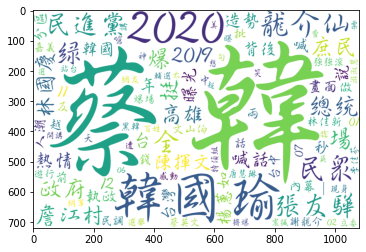

In [ ]:
plt.imshow(wc)

In [ ]:
wc.to_file('/content/drive/MyDrive/SMOA/tornato_wordcloud.png')

In [ ]:
# 生成文字雲
wc.generate_from_frequencies(dict(wawawa_termFreq_list)) # 吃入次數字典資料

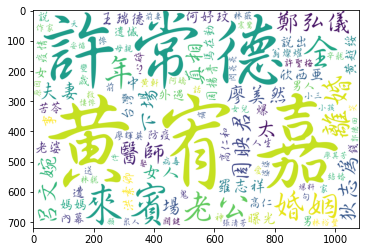

In [ ]:
plt.imshow(wc)

In [ ]:
wc.to_file('/content/drive/MyDrive/SMOA/wawawa_wordcloud.png')